In [7]:
# Install dependencies
!pip install -q -U pandas plotly nbformat kaleido


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Clone repo to get access to data/ directory
!git clone https://github.com/andreped/breast-cancer-stats.git
%cd breast-cancer-stats/apps/

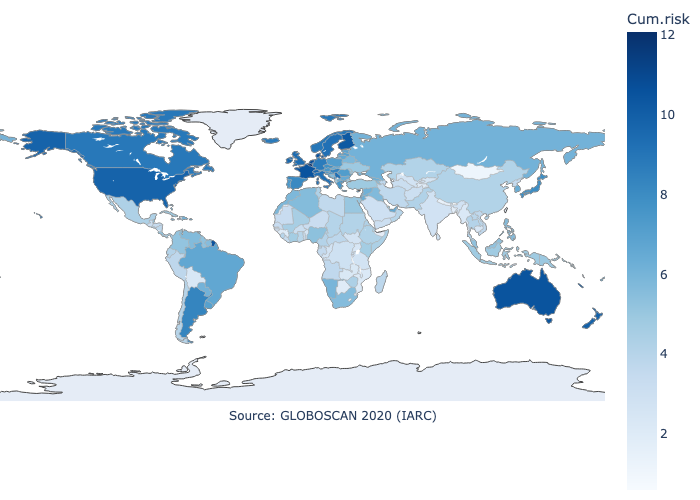

In [8]:
import plotly.graph_objects as go
import pandas as pd
import os


cancer_data = pd.read_csv("../data/cum_risk_breast_cancer_incidence.csv")

fig = go.Figure(data=go.Choropleth(
    locations = cancer_data['ISO code'],
    z = cancer_data['Value'],
    text = cancer_data['Population'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '%',
    colorbar_title = 'Cum.risk',
))

fig.update_layout(
    #title_text='Estimated cumulative risk of breast cancer mortality in 2020, females, ages 0-74',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.15,
        xref='paper',
        yref='paper',
        text='Source: GLOBOSCAN 2020 (IARC)',
        showarrow = False
    )],
    margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin  <- Need to be adjusted if title is added!
    )
)

os.makedirs("results/", exist_ok=True)

fig.show(renderer="png")
fig.write_image("results/cum_risk_breast_cancer_incidence.svg")
